# Submission Information:

### Team Name:
* hahaha

### Team Member 1:
* UNI:  ds3516
* Name: Danning Sui

### Team Member 2:
* UNI:  mz2597
* Name: Minghong Zheng

# Step0 - Import Libraries, Load Data [0 points]

This is the basic step where you can load the data and create train and test sets for internal validation as per your convinience.

In [62]:
#write code below, you can make multiple cells
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Step1 - Exploration and Preparation [10 points]

In this step, we expect you to look into the data and try to understand it before modeling. This understanding may lead to some basic data preparation steps which are common across the two model sets required.

In [63]:
#write code below, you can make multiple cells
df = pd.read_csv("data/data.csv", na_values = 99999)
holdout = pd.read_csv('data/holdout.csv')


# information leakage feature drop
data = df.drop("duration", axis = 1)
holdout = holdout.drop('duration', axis = 1)

Since the duration of a call is not known before a call, so drop the duration column

In [3]:
########## imputation NaN ############

holdout.replace({'credit_default':{np.nan:'unknown'}},inplace = True)

As you can see below, there are no other missing values.

In [4]:
data.isnull().sum()

age               0
job               0
marital_status    0
education         0
credit_default    0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
prev_days         0
prev_contacts     0
prev_outcomes     0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
subscribed        0
dtype: int64

In [5]:
data.head()

,age,job,marital_status,education,credit_default,housing,loan,contact,month,day_of_week,campaign,prev_days,prev_contacts,prev_outcomes,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,41.0,blue-collar,married,basic.9y,no,yes,no,cellular,apr,mon,2.0,999,0,nonexistent,-1.695118,92.698705,-46.727552,1.345160,5097.0,no
1,46.0,entrepreneur,married,unknown,no,no,no,cellular,may,wed,2.0,999,0,nonexistent,-1.767159,92.914878,-46.313088,1.314499,5100.0,no
2,56.0,unemployed,married,basic.9y,no,yes,yes,cellular,nov,fri,1.0,999,0,nonexistent,-0.100365,93.423076,-41.904559,4.003471,5193.0,no
3,89.0,retired,divorced,basic.4y,no,yes,no,cellular,may,wed,4.0,999,0,nonexistent,-1.771314,93.672814,-46.045500,1.261668,5100.0,no
4,34.0,entrepreneur,married,university.degree,unknown,yes,no,cellular,jul,thu,8.0,999,0,nonexistent,1.458103,94.296285,-42.455877,5.152077,5233.0,no


Check the data types

As you can see. Most of the data are categorical data 

In [6]:
data.dtypes

age               float64
job                object
marital_status     object
education          object
credit_default     object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
prev_days           int64
prev_contacts       int64
prev_outcomes      object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
subscribed         object
dtype: object

In [7]:
data.describe()

,age,campaign,prev_days,prev_contacts,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.019059,2.641639,961.537906,0.174385,0.080115,93.583705,-40.496740,3.618901,5166.932832
std,10.850807,2.803230,189.209917,0.498989,1.573180,1.162662,4.645301,1.737149,72.439480
min,17.000000,1.000000,0.000000,0.000000,-3.695294,88.311974,-52.220779,0.325461,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.724208,92.800661,-43.087110,1.377065,5101.000000
50%,38.000000,2.000000,999.000000,0.000000,1.085053,93.586959,-41.685507,4.800570,5194.000000
75%,47.000000,3.000000,999.000000,0.000000,1.366367,94.381404,-36.404580,4.943674,5226.000000
max,97.000000,56.000000,999.000000,7.000000,1.785673,98.263042,-25.323735,5.362403,5249.000000


Continouns Data Analysis

As you can see the distribtuions of column prev_days and prev_contacts are not normal.

--Most of prev_days are 999

--Most of prev_contacts are 0

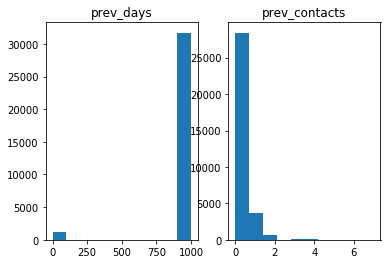

In [8]:
# Three subplots sharing both x/y axes
f,a = plt.subplots(1,2)
a = a.ravel()
a[0].hist(data['prev_days'])
a[0].set_title('prev_days')
a[1].hist(data['prev_contacts'])
a[1].set_title('prev_contacts')

plt.show()

Check whether the distributions in subscribed users vs unsubscribed users

As you can see below, there are the distributions are almost the same.

They are still a lot of 0 in prevs_contacts and 999 in prevs_days in both groups.

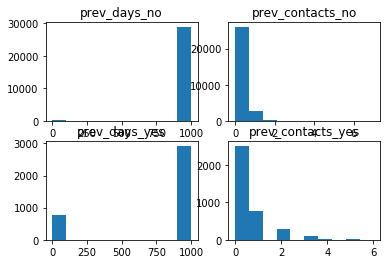

In [9]:

f,a = plt.subplots(2,2)
a = a.ravel()
a[0].hist(data[data['subscribed']=='no']['prev_days'])
a[0].set_title('prev_days_no')
a[1].hist(data[data['subscribed']=='no']['prev_contacts'])
a[1].set_title('prev_contacts_no')
a[2].hist(data[data['subscribed']=='yes']['prev_days'])
a[2].set_title('prev_days_yes')
a[3].hist(data[data['subscribed']=='yes']['prev_contacts'])
a[3].set_title('prev_contacts_yes')
plt.show()

In [10]:
print("prev_days 999 values %f" % (len(data[data['prev_days']==999])/float(data.shape[0])))
print("prev_contcts 0 values %f" % (len(data[data['prev_contacts']==0])/float(data.shape[0])))

prev_days 999 values 0.962276
prev_contcts 0 values 0.862610


As you can see above, we decieded to drop prev_days since it is highly correlated to prev_contacts 

In [64]:
data=data.drop('prev_days', 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a6cbeb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10caddc88>]], dtype=object)

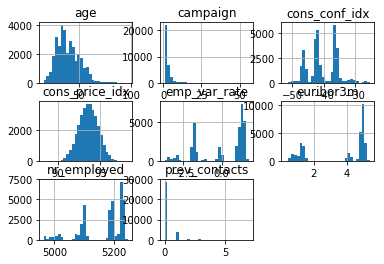

In [12]:
data.hist(bins = 30)

In [13]:
sum(data[data.columns[-1]] == 'no')/data.shape[0]
# because the 'no' is much more than 'yes' in y_train, so we need to resampling the imbalanced data later
# data is imbalanced

0.88734446130500755

Categorical Data Analysis

As you can see below, there are many unknown values. We regard them as a type of instead of missing value

In [14]:
category={}
for i in ['job','marital_status','education','credit_default','housing','loan','contact','month','day_of_week','prev_outcomes','subscribed']:
    category[i]=data[i].unique()

pd.set_option('display.max_colwidth', -1)
pd.Series(category)

contact           [cellular, telephone]                                                                                                                 
credit_default    [no, unknown, yes]                                                                                                                    
day_of_week       [mon, wed, fri, thu, tue]                                                                                                             
education         [basic.9y, unknown, basic.4y, university.degree, basic.6y, high.school, professional.course, illiterate]                              
housing           [yes, no, unknown]                                                                                                                    
job               [blue-collar, entrepreneur, unemployed, retired, technician, services, management, admin., self-employed, unknown, housemaid, student]
loan              [no, yes, unknown]                                              

Target Value Analysis

As you can see below, only 11% of users  subscribed during this campagins, so this is imbalanced data. We should resample 
the data to do the prediction.

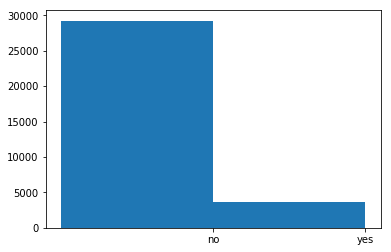

Conversion Rate is 0.11


In [15]:
from collections import Counter
result=data['subscribed']
labels, values = zip(*Counter(result).items())
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()
print("Conversion Rate is", round(sum(result=="yes")/float(len(result)),2))

In [65]:
# ordered-categorical and change into continuous
# data.replace({"education":{"illiterate": 1, "basic.4y": 2, "basic.6y" :3, "basic.9y": 4, "high.school":5, "professional.course": 6, "university.degree":7, "unknown": 0}},inplace=True)
# holdout.replace({"education":{"illiterate": 1, "basic.4y": 2, "basic.6y" :3, "basic.9y": 4, "high.school":5, "professional.course": 6, "university.degree":7, "unknown": 0}},inplace=True)

######## we found that the preprocess above won't improve our performance, so we chose not to implement it ######

# variable extraction and assignment
y = data.subscribed.replace({"yes":1, "no": 0})
data = data.drop("subscribed", axis=1)

ID = holdout['ID']
holdout = holdout.drop('ID', axis = 1)

# continuous data column extraction
data_continuous = data[data.columns[data.dtypes != "object"]]

# categorical data column extraction
data_categorical = data[data.columns[data.dtypes == "object"]]

# get dummy
X = pd.get_dummies(data, columns = data_categorical.columns)

holdout.credit_default = holdout.credit_default.astype('category',categories=list(['yes','no','unkown']))
hold_out = pd.get_dummies(holdout, columns = data_categorical.columns)

######### now data is ready for further feature engineering or fitting ############
# X_train: X
# y_train : y
# X_test: hold_out

In [17]:
hold_out.head()

,age,campaign,prev_days,prev_contacts,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,prev_outcomes_failure,prev_outcomes_nonexistent,prev_outcomes_success
0,47.0,2.0,999,0,1.247123,92.972198,-35.612530,4.932103,5190.0,1,...,0,0,0,0,0,1,0,0,1,0
1,40.0,5.0,999,0,1.336096,95.085866,-40.841331,5.082825,5225.0,0,...,0,0,0,1,0,0,0,0,1,0
2,42.0,3.0,999,0,1.388607,93.705043,-42.039772,4.941916,5232.0,0,...,0,0,0,0,1,0,0,0,1,0
3,53.0,1.0,999,0,1.146340,92.826786,-36.824117,4.916084,5205.0,0,...,0,0,1,0,0,0,0,0,1,0
4,54.0,6.0,999,0,1.490160,94.392184,-36.710934,4.999765,5226.0,0,...,0,0,1,0,0,0,0,0,1,0


# Step2 - ModelSet1 [35 points]

In this step, we expect you to perform the following steps relevant to the models you choose for set1:

* feature engineering
* validation
* feature selection
* final model selection

You may select up to 5 models in this step for the purpose of final ensemble. Any classification algorithm covered in class apart from tree-based models can be tested here.

### Basic Preprocessing Benchmark

In [18]:
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


###### define a class to predict probability in cross_val_score proecess ###########
class proba_logreg(LogisticRegression):
    def predict(self, X):
        return LogisticRegression.predict_proba(self, X)

########## test the basic preprocess performance ##################
pipe = make_pipeline(StandardScaler(), proba_logreg())
scores = cross_val_score(pipe, X, y, cv=10, scoring='roc_auc')
print(np.mean(scores))

0.791129468537



### Feature Selection

#### a. feature importance

In [19]:
######### rank the feature by importance #######
lr_whole = LogisticRegression().fit(X, y)

importances = lr_whole.coef_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns.values[f], importances[0][indices[0][f]]))
     #print(f + 1, indices[f], importances[indices[f]],X_train_subsample1[f])


Feature ranking:
1. feature age (-0.487010)
2. feature campaign (-0.365016)
3. feature prev_contacts (-0.277347)
4. feature emp_var_rate (-0.178021)
5. feature cons_price_idx (-0.142353)
6. feature cons_conf_idx (-0.131594)
7. feature euribor3m (-0.127261)
8. feature nr_employed (-0.117966)
9. feature job_admin. (-0.077187)
10. feature job_blue-collar (-0.074225)
11. feature job_entrepreneur (-0.050175)
12. feature job_housemaid (-0.036945)
13. feature job_management (-0.032597)
14. feature job_retired (-0.032501)
15. feature job_self-employed (-0.032123)
16. feature job_services (-0.027589)
17. feature job_student (-0.023201)
18. feature job_technician (-0.013543)
19. feature job_unemployed (-0.011435)
20. feature job_unknown (-0.011261)
21. feature marital_status_divorced (-0.010328)
22. feature marital_status_married (-0.009861)
23. feature marital_status_single (-0.009805)
24. feature marital_status_unknown (-0.004284)
25. feature education_basic.4y (-0.003675)
26. feature educatio

Here we see that the `prev_days` feature is very important. However there are lots of `999` in the data, which dosen't normally make sense. Also its meaning is rather close to the other variables (e.g. `prev_contatcs`). So we should take a closer look at their correlations.

#### b. f_regression

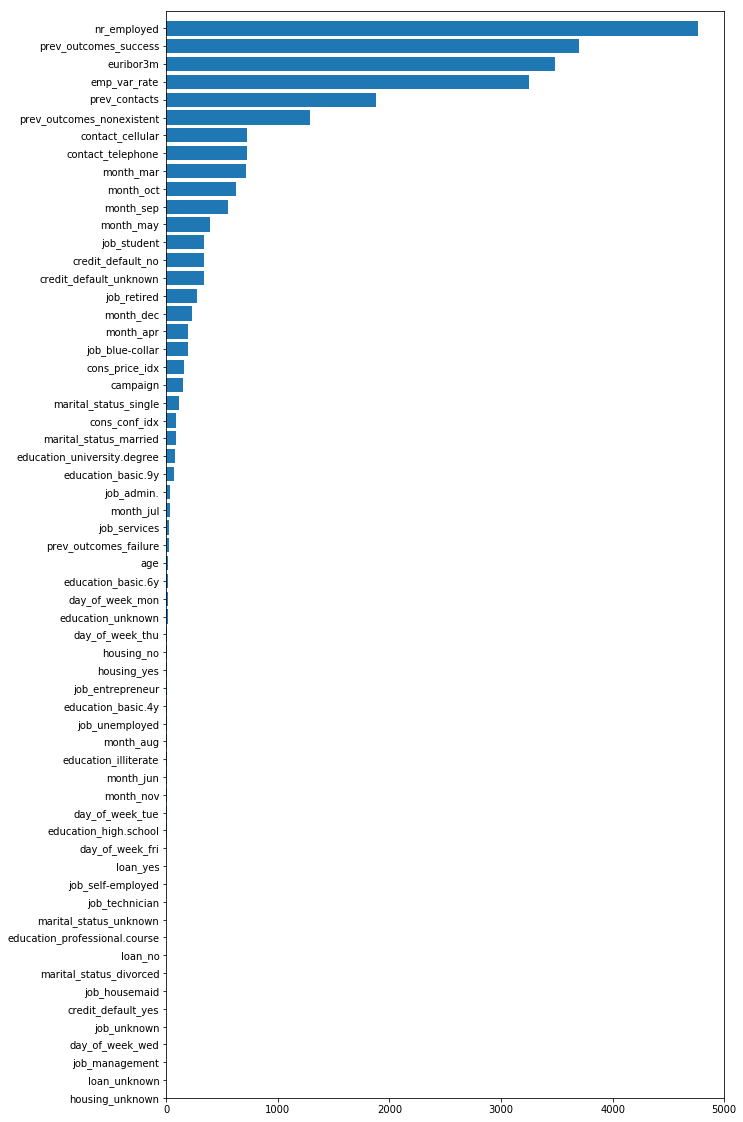

In [22]:
from sklearn.feature_selection import f_regression
F, p = f_regression(X, y)

top_n =X.shape[1]
inds = np.argsort(F)
plt.figure(figsize=(10, 20))
plt.barh(np.arange(top_n), F[inds[-top_n:]])
plt.yticks(np.arange(top_n), X.columns[inds[-top_n:]])
plt.ylim(0, top_n)
plt.show()

Here we can see lots of variables have score of 0 on `f_regression`, which means they have no linear correlation with the y. From the graph we can tell that we only need to pick the first 50%.

### Feature Engineering

With basic preprossing (scale and resample), here we get our cv score 0.791398763195 as benchmark for logistic regression. 

#### a. Polynomial Features

With the f_regression result, we want to apply Polynomial feature on the linear models

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile

# feature_pipe = make_pipeline(SelectPercentile(score_func = f_regression, percentile=50),
#                              PolynomialFeatures(interaction_only=True), StandardScaler(),
#                              proba_logreg())
# score = cross_val_score(feature_pipe, X, y, cv = 10, scoring= 'roc_auc')
# print(np.mean(score))

Here the cv score is 0.7920, which is higher than our benchmark 0.7911. So the feature selection (f_regression) as well as the feature engineering (Polynomial Feature) is effective. We would apply them in our final model.

#### b. Box-Cox
Since we saw the data distribution before that they are not normal distributed, for linear models, we want to boxcox the continuous data and test the model again.

In [27]:
############# min-max-scaler + boxcox on continuous data + standard scaler #################
def minmaxboxcox(X_train, X_test, y_train):
    
    # extract the continuous data first
    # minmax scaler to get positive data first
    
    fig, axes = plt.subplots(2,4,figsize = (20, 10))
    train_continuous = X_train[data_continuous.columns]
    test_continuous = X_test[data_continuous.columns]
    minmaxscaler = MinMaxScaler().fit(train_continuous)
    train_mm = minmaxscaler.transform(train_continuous)
    test_mm = minmaxscaler.transform(test_continuous)
    X_bc_train = []
    X_bc_test = []
    
    # boxcox and plot 
    for i, ax in enumerate(axes.ravel()):
        if i > 8:
            ax.set_visible(False)
        x_train, lambda_x_train = stats.boxcox(train_mm[: ,i] + 1e-5)
        X_bc_train.append(x_train)
        ax.hist(x_train, bins = 'auto')
        ax.set_title("{}:{}{:.2f}".format(i, train_continuous.columns[i], lambda_x_train))

        x_test, lambda_x_test = stats.boxcox(test_mm[: ,i] + 1e-5)
        X_bc_test.append(x_test)
        ax.hist(x_test, bins = 'auto')
        ax.set_title("{}:{}{:.2f}".format(i, test_continuous.columns[i], lambda_x_test))
    
    X_bc_train = np.array(X_bc_train).T
    X_bc_test = np.array(X_bc_test).T

    # standard scaler the data
    standardscaler = StandardScaler().fit(X_bc_train)
    X_bc_train_scaled = standardscaler.transform(X_bc_train)
    X_bc_test_scaled = standardscaler.transform(X_bc_test)
    
    
    fig, axes = plt.subplots(2,4, figsize=(20,10))
    for i, ax in enumerate(axes.ravel()):
        if i > 9:
            ax.set_visible(False)
            continue
        ax.plot(X_bc_train_scaled[:,i], y_train, 'o', alpha = 0.5)
        ax.set_title('{}:{}'.format(i, train_continuous.columns[i]))
        
    

    return X_bc_train_scaled, X_bc_test_scaled


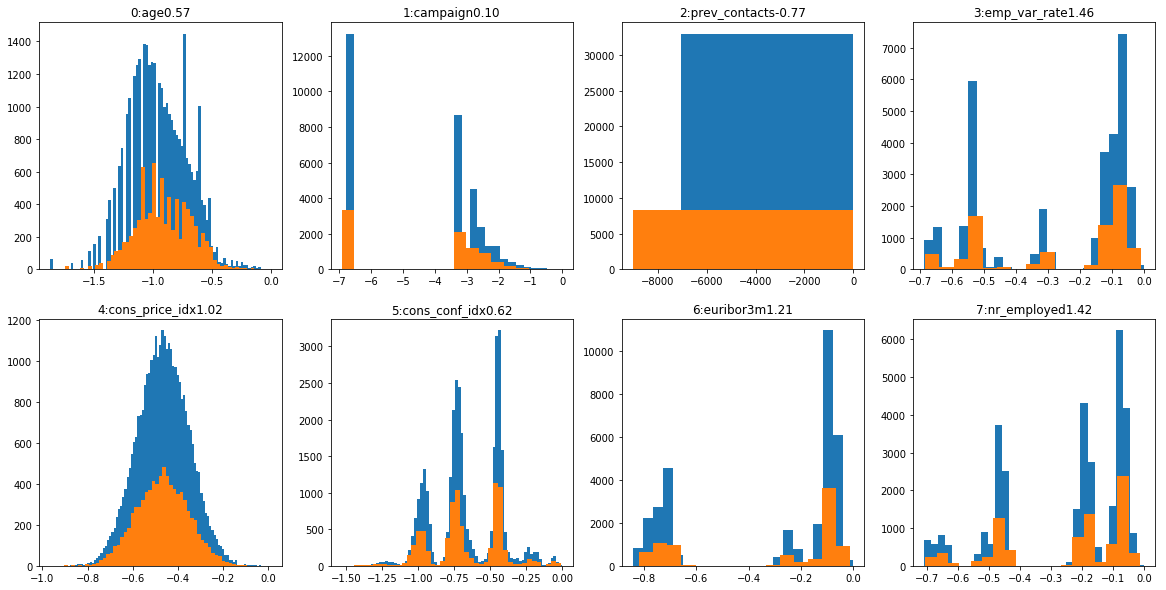

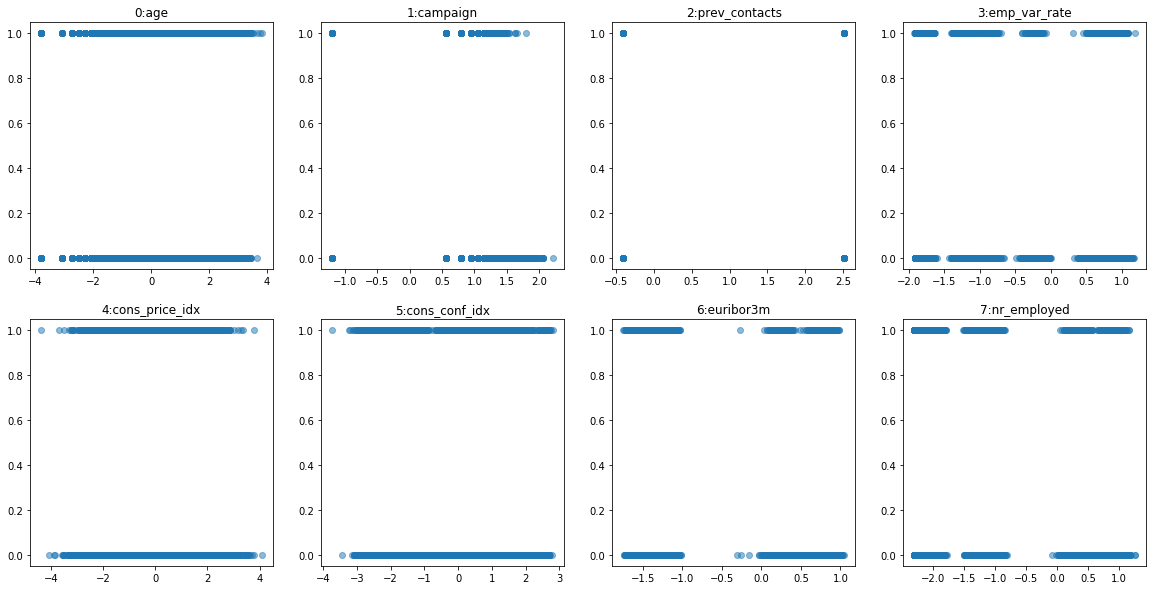

In [28]:
X_bc_train_scaled, X_bc_test_scaled = minmaxboxcox(X, hold_out, y)

Above we can see the training data (blue) and the testing data (orange) distribution after the boxcox. Also we can plot the training X against training y. They are now more suitable for the linear models.

In [29]:
# ########## combine box-coxed continuous data and categorical data again ##########

# # X[data_continuous.columns] = X_bc_train_scaled
# hold_out[data_continuous.columns] = X_bc_test_scaled

In [30]:
# ############ test the boxcox performance ##############
# scores = cross_val_score(proba_logreg(), X, y, cv=10, scoring='roc_auc')
# print(np.mean(scores))

We found that the score 0.790879425564 is lower than the initial score, so the boxcox is not suitable for this dataset. We decide not to use this feature engineering technique.

### Resampling Techique Evaluation and Comparison

Here we implemented the UnderSampling and OverSampling techniques, we visualize their effects.

In [31]:
########## resampling the data ###############
## under sampler
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(replacement=False)
X_subsample, y_subsample = rus.fit_sample(X, y)
print(X.shape)
print(X_subsample.shape)
print(np.bincount(y_subsample))

(32950, 61)
(7424, 61)
[3712 3712]


In [32]:
## over sampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_oversample, y_oversample = ros.fit_sample(X, y)
print(X.shape)
print(X_oversample.shape)
print(np.bincount(y_oversample))

(32950, 61)
(58476, 61)
[29238 29238]


In [33]:
oversample_pipe = make_imb_pipeline(StandardScaler(), RandomOverSampler(), proba_logreg())
scores = cross_val_score(oversample_pipe, X, y, cv=10, scoring='roc_auc')
print(np.mean(scores))

0.792226042651


In [34]:
undersample_pipe = make_imb_pipeline(StandardScaler(), RandomUnderSampler(), proba_logreg())
scores = cross_val_score(undersample_pipe, X, y, cv=10, scoring='roc_auc')
print(np.mean(scores))

0.792581217506


Here we found that **RandomOverSampler** would perform better than the **RandomUnderSampler**, but they are both not stable.

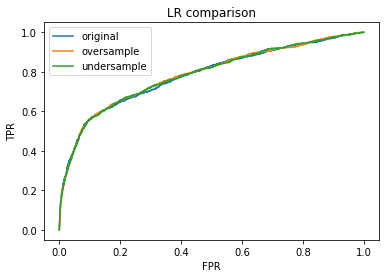

In [35]:
############ visualization the sampler effect #############
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# standard scaler the data
standardscaler = StandardScaler().fit(X_train)
X_train_scaled = standardscaler.transform(X_train)
X_test_scaled = standardscaler.transform(X_test)


from sklearn.metrics import roc_curve
oversample_pipe.fit(X_train_scaled, y_train)
props_oversample = oversample_pipe.predict_proba(X_test_scaled)[:, 1]
fpr_over, tpr_over, _ = roc_curve(y_test, props_oversample)

undersample_pipe.fit(X_train_scaled, y_train)
props_undersample = undersample_pipe.predict_proba(X_test_scaled)[:, 1]
fpr_under, tpr_under, _ = roc_curve(y_test, props_undersample)

lr = LogisticRegression().fit(X_train_scaled, y_train)
props_original = lr.predict_proba(X_test_scaled)[:, 1]
fpr_org, tpr_org, _ = roc_curve(y_test, props_original)

plt.plot(fpr_org, tpr_org, label="original")
plt.plot(fpr_over, tpr_over, label="oversample")
plt.plot(fpr_under, tpr_under, label="undersample")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("LR comparison")

From this graph what we can know is that both of these two sampler don't have much effect on the data.

### Model Selection

#### a. Logistic Regression

In [36]:
# ########### parameter tuning ##########

from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [0.001, 0.1, 1, 10, 100, 400, 500, 1000] }
# grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=10)
# grid.fit(X, y)
# print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
# print("best parameters: {}".format(grid.best_params_))

# #print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

The best mean cross-validation score is 0.899, and the best parameters is 400.

In [37]:
# Apply the best parameters with previous selected techniques

logreg_pipe = make_imb_pipeline(SelectPercentile(score_func = f_regression, percentile=50),
                                    PolynomialFeatures(interaction_only=True),
                                        StandardScaler(), RandomOverSampler(), proba_logreg(C=400))
scores = cross_val_score(oversample_pipe, X, y, cv=10, scoring='roc_auc')
print(np.mean(scores))

0.792945267342


In [ ]:
# logreg_pipe.fit(X, y)
# y_holdout_pred = logreg_pipe.predict_proba(hold_out)[:,1]

# #### write the data into csv ##########
# with open('output_log.csv', 'w') as f:
#     f.write('ID' + ',' + 'subscribed\n')
#     for i in range(y_holdout_pred.shape[0]):
#         f.write( str(ID[i]) + ',' + str(y_holdout_pred[i]) + '\n' )

Here we obtain the best score for Logistic Regression. We uploaded it and it achieves 0.78318, which is higher than the benchmark. Thus we think this model has a good performance and we can further apply it in our ensemble part.

#### b. SVM

In [ ]:
# ################## SVM ###########################
# from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline as make_imb_pipeline

# svm_pipe = make_imb_pipeline(StandardScaler(), RandomOverSampler(), SVC())
# scores = cross_val_score(svm_pipe, X, y, cv=10, scoring='roc_auc')
# print(np.mean(scores))

We found out that the score of SVM model is rather low (0.721411693334), and it is super slow. So we decided not to use it or tune it furturemore.

#### c. KNN

In [ ]:
# ####################  KNN  #############################
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {'n_neighbors':  np.arange(1, 10, 3)}
# grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)
# grid.fit(X, y)
# print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
# print("best parameters: {}".format(grid.best_params_))

Here we can see the best parameter `n_neighbors` is 4, so we apply it in our model.

In [ ]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import RandomOverSampler
# from sklearn.neighbors import KNeighborsClassifier

# KNN_pipe = make_imb_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 4))
# KNN_pipe.fit(X, y) 
# knn_pred = KNN_pipe.predict_proba(hold_out)[:,1]

The result of KNN got a rather low score on Leaderboard, which is 0.71306. Thus we decided to throw it away.

# Step3 - ModelSet2 [35 points]

In this step, we expect you to perform the following steps relevant to the models you choose for set2:

* feature engineering
* validation
* feature selection
* final model selection

You may select up to 5 models in this step for the purpose of final ensemble. We encourage you to try decition tree, random forest and gradient boosted tree methods here and pick the one which you think works best.

### Feature Selection

#### a. mutual information

In [39]:
from sklearn.feature_selection import mutual_info_regression
# mi = mutual_info_regression(X, y)
# inds = np.argsort(mi)

# top_n =X.shape[1]

# plt.figure(figsize=(10, 20))
# plt.barh(np.arange(top_n), mi[inds[-top_n:]])
# plt.yticks(np.arange(top_n), X.columns[inds[-top_n:]])
# plt.ylim(0, top_n)
# plt.show()

Here because the mutual info regression is rather slow, we comment it. The plot tells us that only the first 75% are not 0, which means we can select a percentile in our raw data. 

Create a new dataset with only top 50% importance features

In [ ]:
# from sklearn.feature_selection import mutual_info_regression
# MIR_Selection=SelectPercentile(score_func=mutual_info_regression, percentile=50)


# MIR_Selection_fit=MIR_Selection.fit(X,y)  #here, training are the first 9 data vectors, and the last one is the test set
# MIR_Selection_Transform=MIR_Selection.transform(X)  #here, training are the first 9 data vectors, and the last one is the test set
# idx = np.arange(0, X.shape[1])  #create an index array
# features_to_keep = idx[MIR_Selection.get_support() == True]  #get index positions of kept features

# X_new=X[X.columns[features_to_keep]]

### Resampling

As you can see from the Part 1, only 11% users subscribes the bank's service. The data is imbalaced, so we need to resample the data.

We will compare perfromance of EnsembleResampling, OverSampling, UnderSampling in decision tree model.

I will apply the one with best performance to Random Froest and Gradient Boosting.

### Model Selection

#### a. Decision Tree

###### Undersampling

In [43]:
#with polynomial features, undersampling, and decision tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier

pipe_under_DT = make_imb_pipeline(PolynomialFeatures(interaction_only=True), VarianceThreshold(),
                     RandomUnderSampler(),DecisionTreeClassifier(max_features='auto',max_depth=10,random_state=2))

#Build the decision tree model and do cross validation
scores = np.mean(cross_val_score(pipe_under_DT, X, y, cv=10, scoring='roc_auc'))
print(scores)

0.74507638924


##### Oversampling

In [45]:
#with polynomial features, undersampling, and decision tree

pipe_over_DT = make_imb_pipeline(PolynomialFeatures(interaction_only=True), VarianceThreshold(),
                     RandomOverSampler(),DecisionTreeClassifier(max_features='auto',max_depth=10,random_state=2))

#Build the decision tree model and do cross validation
scores = np.mean(cross_val_score(pipe_over_DT, X, y, cv=10, scoring='roc_auc'))
print(scores)

0.756862201086


##### EnsembleResampling

In [46]:
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

def make_resampled_ensemble(estimator, n_estimators=100):
    estimators = []
    for i in range(n_estimators):
        est = clone(estimator)
        if hasattr(est, "random_state"):
            est.random_state = i
        pipe = make_imb_pipeline(StandardScaler(), RandomUnderSampler(random_state=i, replacement=True), est)
        estimators.append(("est_i".format(i), pipe))
    return VotingClassifier(estimators, voting="soft")

In [47]:
from sklearn.tree import DecisionTreeClassifier

resampled_tree_test = make_resampled_ensemble(DecisionTreeClassifier(max_features='auto'))
resampled_tree_test

VotingClassifier(estimators=[('est_i', Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomundersampler', RandomUnderSampler(random_state=0, ratio='auto', replacement=True,
          return_indices=False)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weig...t=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=99, splitter='best'))]))],
         n_jobs=1, voting='soft', weights=None)

In [48]:
np.mean(cross_val_score(resampled_tree_test, X, y, cv =10, scoring = 'roc_auc'))

0.78558216943897285

As you can see above, Ensemblesampling doing the best job.  so we will use the ensemblesampling to comapre the three
models performance

In [ ]:
# model = resampled_tree_test.fit(X, y)

# voting = model.predict_proba(hold_out)[:,1]

# with open('output-voting.csv', 'w') as f:
#     f.write('ID' + ',' + 'subscribed\n')
#     for i in range(voting.shape[0]):
#         f.write( str(ID[i]) + ',' + str(voting[i]) + '\n' )

Here we uploaded the results to leaderboard, and it increases the score slightly.

##### Parameter Tuning
Tuning the Max depth parameter using Gradient Search

In [ ]:
# #with polynomial features, undersampling, and decision tree
# pipe_ES_DT = make_imb_pipeline(PolynomialFeatures(interaction_only=True), VarianceThreshold(),
#                      make_resampled_ensemble(DecisionTreeClassifier(max_features='auto',random_state=2)))
# #Tunning the max_depth
# param_grid={'votingclassifier__est_i__decisiontreeclassifier__max_depth':range(6,12,1)}
# grid=GridSearchCV(pipe_ES_DT,param_grid,cv=10,scoring='roc_auc')
# grid.fit(X_new, y)
# print(grid.best_params_)
# print(grid.best_score_ )#roc_auc

# #Build the decision tree model
# DT2 = pipe_ES_DT(max_features='auto',max_depth=grid.best_params_['votingclassifier__est_i__decisiontreeclassifier__max_depth'])
# DT_ensemble2=DT2.fit(X, y)

The best `max_depth` for decision tree is 9, and cv is 0.782894109269.

In [ ]:
# #### Resampling the data
# resampled_decisiontree_test= make_resampled_ensemble(DecisionTreeClassifier(max_features='auto'))
# param_grid={'est_i__decisiontreeclassifier__max_depth':range(9,11,1)}
# grid=GridSearchCV(resampled_decisiontree_test,param_grid,cv=10,scoring='roc_auc')
# a=grid.fit(X, y)

# print(grid.best_params_)
# print(grid.best_score_ )#roc_auc

After resampling, the best `max_depth` is 9, and cv is 0.789987015523.

#### b. Random Forest

In [56]:
# #with polynomial features, undersampling, and decision tree
# pipe_ES_RF = make_imb_pipeline(PolynomialFeatures(interaction_only=True), VarianceThreshold(),
#                      make_resampled_ensemble(RandomForestClassifier(max_features='auto',random_state=2)))
# #Tunning the max_depth
# param_grid={'votingclassifier__est_i__randomforestclassifier__max_depth':range(6,8,1)}
# grid=GridSearchCV(pipe_ES_RF,param_grid,cv=10,scoring='roc_auc')
# grid.fit(X_new, y)
# print(grid.best_params_)
# print(grid.best_score_ )#roc_auc
# #
#Build the decision tree model
from sklearn.ensemble import RandomForestClassifier
rf = make_imb_pipeline(make_resampled_ensemble(RandomForestClassifier(max_features='auto',random_state=2,max_depth=6)))
scores = np.mean(cross_val_score(rf, X, y, cv=10, scoring='roc_auc'))

In [59]:
print(np.mean(scores))

0.795069526485


Here because of the GridSearch, it takes a long time to run again. Here the best `max_depth` is 6, and the best cv is 0.7970404663.

#### c. Gradient Boosting

##### Parameter Tuning

In [ ]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile, VarianceThreshold
from sklearn.model_selection import GridSearchCV




# #with polynomial features, undersampling, and gradient boosting
# pipe_ES_GB = make_imb_pipeline(PolynomialFeatures(interaction_only=True), VarianceThreshold(),
#                      make_resampled_ensemble(GradientBoostingClassifier(max_features='sqrt',random_state=2,n_estimators=120)))
# #Tunning the max_depth
# param_grid={'votingclassifier__est_i__gradientboostingclassifier__max_depth':range(6,12,1),
#             'votingclassifier__est_i__gradientboostingclassifier__learning_rate':np.arange(0.01,0.1,0.01),
#             'votingclassifier__est_i__gradientboostingclassifier__min_samples_split':range(450,550,10),
#             'votingclassifier__est_i__gradientboostingclassifier__min_samples_leaf':range(20,70,10)
           
           
#            }
# grid=GridSearchCV(pipe_ES_GB,param_grid,cv=10,scoring='roc_auc')
# grid.fit(X_new, y)
# print(grid.best_params_)
# print(grid.best_score_ )#roc_auc

Here we come up with the best parameters:
max_depth = 9, n_estimators = 120, learning_rate = 0.05, max_features = 'sqrt', min_samples_split = 500, min_samples_leaf = 50

Because it takes too long, we comment it.

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

oversample_pipe = make_imb_pipeline(StandardScaler(), RandomOverSampler(), 
                                    GradientBoostingClassifier(max_depth = 9, n_estimators = 120, 
                                                               learning_rate = 0.05, max_features = 'sqrt', 
                                                               min_samples_split = 500, min_samples_leaf = 50))
scores = cross_val_score(oversample_pipe, X, y, cv=10, scoring='roc_auc')
print(np.mean(scores))

0.7970404663


In [ ]:
# gbc = GradientBoostingClassifier(max_depth = 9, n_estimators = 120, learning_rate = 0.05, max_features = 'sqrt', min_samples_split = 500, min_samples_leaf = 50).fit(X,y)
# gbc_pred = gbc.predict_proba(hold_out)[:,1]

# with open('output-gbc.csv', 'w') as f:
#     f.write('ID' + ',' + 'subscribed\n')
#     for i in range(gbc_pred.shape[0]):
#         f.write( str(ID[i]) + ',' + str(gbc_pred[i]) + '\n' )

We upload the result and it achieves one of the highest score.

# Step4 - Ensemble [20 points + 10 Bonus points]

In this step, we expect you to use the models created before and create new predictions. You should definitely try poor man's stacking but we encourage you to think of different ensemble techniques as well. We will judge your creativity and improvement in model performance using ensemble models and you can potentially earn 10 bonus points here.

#### a. Voting Classifier (Gradient Boosting + Logistic Regression)

In [60]:
voting2 = VotingClassifier([('logreg', proba_logreg(C=400)),
                          ('gb', GradientBoostingClassifier(max_depth = 9, n_estimators = 120, 
                                                               learning_rate = 0.05, max_features = 'sqrt', 
                                                               min_samples_split = 500, min_samples_leaf = 50))],
                         voting = 'soft')

vc_pipe = make_imb_pipeline(StandardScaler(), RandomOverSampler(), voting2)

final_scores = cross_val_score(vc_pipe, X, y, cv=10, scoring='roc_auc')
print(np.mean(final_scores))

0.797373712644


In [ ]:
# vc = vc_pipe.fit(X, y)
# vc_pred = vc.predict_proba(hold_out)[:,1]
# with open('output-voting2.csv', 'w') as f:
#     f.write('ID' + ',' + 'subscribed\n')
#     for i in range(vc_pred.shape[0]):
#         f.write( str(ID[i]) + ',' + str(vc_pred[i]) + '\n' )

#### b. Poorman Stacking

In [68]:
from sklearn.preprocessing import FunctionTransformer

#preprocessing (Scale and resample the data)
scaler =StandardScaler().fit(X)
X_scaled=scaler.transform(X)
ros = RandomOverSampler(random_state=42)
X_processed,y_processed=ros.fit_sample(X_scaled,y)

#use reshaper to keep only the probabilities of the positive classes!
reshaper = FunctionTransformer(lambda X_: np.rollaxis(X_, 1).reshape(-1, 4)[:, 1::2], validate=False)
stacking = make_pipeline(voting2, reshaper,
                         LogisticRegression(C=100))
stack=stacking.fit(X_processed, y_processed)
print(np.mean(cross_val_score(stack, X_processed, y_processed, cv=10, scoring='roc_auc')))

0.897307864239


Here we found the score is rather high, which may be overfitting. We built a stacking to avoid overfitting then.

In [71]:
from sklearn.model_selection import cross_val_predict
first_stage = make_pipeline(voting2, reshaper)
transform_cv = cross_val_predict(first_stage, X_processed, y_processed, cv=10, method="transform")

#### Coefficent for each functions

second_stage = LogisticRegression(C=100).fit(transform_cv, y_processed)
print(np.mean(cross_val_score(second_stage, transform_cv, y_processed, cv=10, scoring='roc_auc')))
print(second_stage.coef_)

0.860109388414
[[-12.21289851  16.78134422]]


Now the score is rather low, we further generate a prediction with holdout dataset, and the result below got a really low score as 0.67098 on leaderboard. So it won't be a good choice.

In [ ]:
# #scale the holdout data
# holdout_scaled=scaler.transform(hold_out)

# #prediction for stacking
# y_predict=stacking.predict_proba(holdout_scaled)[:,1]

# #prediction for a hold-out stacking 
# y_predict=second_stage.transform(first_stage.transform(holdout_scaled))

# with open('output.csv', 'w') as f:
#     f.write('ID' + ',' + 'subscribed\n')
#     for i in range(y_predict.shape[0]):
#         f.write( str(ID[i]) + ',' + str(y_predict[i]) + '\n' )

#### c. Weighted Ensemble Model

Instead of modeling avearge, we assign more weights to the classifier in a better peformance.


##### GridSearch

In [ ]:
# np.random.seed(123)

# df = pd.DataFrame(columns=('w1', 'w2', 'mean', 'std'))
# ###doin thte same thing as Gradient Search
# i = 0
# for w1 in range(1,4):
#     for w2 in range(1,4):


#         if len(set((w1,w2))) == 1: # skip if all weights are equal
#             continue

#         voting3 = VotingClassifier([('logreg', proba_logreg(C=400)),
#                           ('gb', GradientBoostingClassifier(max_depth = 9, 
#                                                 n_estimators = 120, learning_rate = 0.05, 
#                                                                               min_samples_split = 500, min_samples_leaf = 50))],
#                          voting = 'soft',weights=[w1,w2])
#         vc_pipe1 = make_imb_pipeline(StandardScaler(), RandomOverSampler(), voting3)

#         scores = np.mean(cross_val_score(vc_pipe1, X_new, y, cv=3, scoring='roc_auc'))

#         df.loc[i] = [w1, w2, scores.mean(), scores.std()]
#         i += 1

# df.sort(columns=['mean', 'std'], ascending=False)



Index |	w1|	w2|	mean_cv|std
------|---|---|-----|--------
4	|3.0|	1.0|	0.795457|	0.0
2	|2.0|	1.0	|0.795346	|0.0
5	|3.0|	2.0	|0.795286|	0.0
1	|1.0|	3.0	|0.795042|	0.0
0	|1.0|	2.0	|0.794624|	0.0
3	|2.0|	3.0	|0.793196|	0.0

In [77]:
#Build the  model
voting3 = VotingClassifier([('logreg', proba_logreg(C=400)),
                          ('gb', GradientBoostingClassifier(max_depth = 9, 
                                                n_estimators = 120, learning_rate = 0.05, 
                                                                              min_samples_split = 500, min_samples_leaf = 50))],
                         voting = 'soft',weights=[3,1])

vc_pipe1 = make_imb_pipeline(StandardScaler(), RandomOverSampler(), voting3)

In [ ]:
# vc_pipe1.fit(X_new, y)
# y_predict=vc_pipe1.predict_proba(hold_out_new)[:,1]


# with open('output_we.csv', 'w') as f:
#     f.write('ID' + ',' + 'subscribed\n')
#     for i in range(y_predict.shape[0]):
#         f.write( str(ID[i]) + ',' + str(y_predict[i]) + '\n' )

Here we submit the output csv to the leaderboard, which we found is an improvement of the pure model. However it is not an improvement of modeling average. So we may not apply it finally. This may be because we haven't found the best weight due to the time limit, as it is a time consuming process.

# Conclusion

Overall, we found that the highest score on LeaderBoard is from the **Voting Classifier ensemble model**. Thus, we chose it as our final model.

### Travis

In [61]:
#write code below, you can make multiple cells
assert np.mean(final_scores) >=0.79